This notebook is the main playground to test the image fusion with Guided Filtering, including tests on the stained-glass windows, multi-focus images, multi-source images and qualitative experiments.

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
%matplotlib inline

from src.utils import *
from src.fusion import *
from src.metrics import (structural_similarity_metric, 
                        normalized_mutual_information_metric, 
                        edge_information_metric)

In [139]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import images

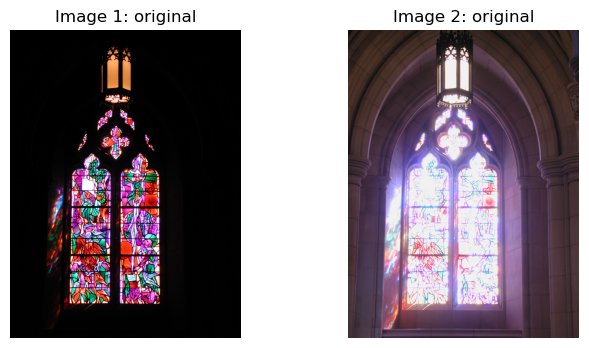

(2048, 1536, 3)


In [140]:
im1 = plt.imread("dataset/cathedral1.jpg")
im2 = plt.imread("dataset/cathedral2.jpg")
show_images(im1, im2, "original", "original")
print(im1.shape)

# Test image fusion

Computing base and detail layers...


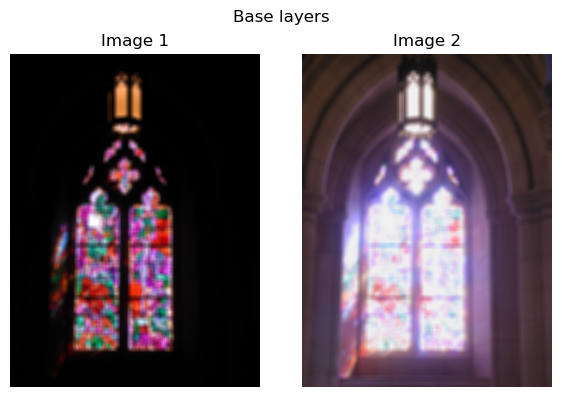

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


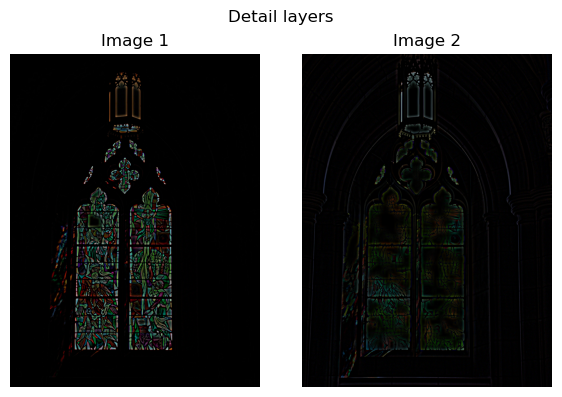


Computing saliency maps...


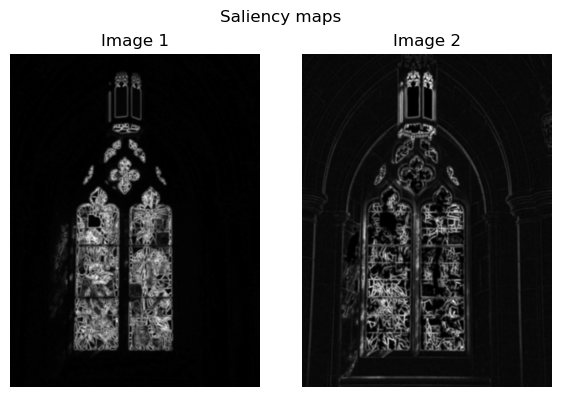


Computing weight maps...


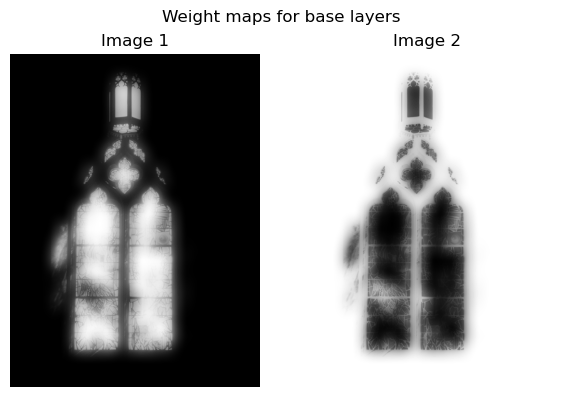

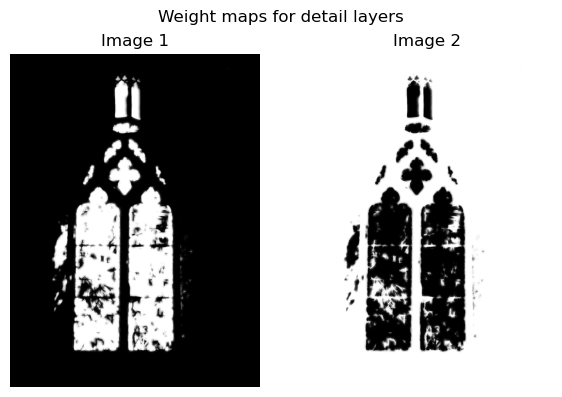


Fusing layers...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


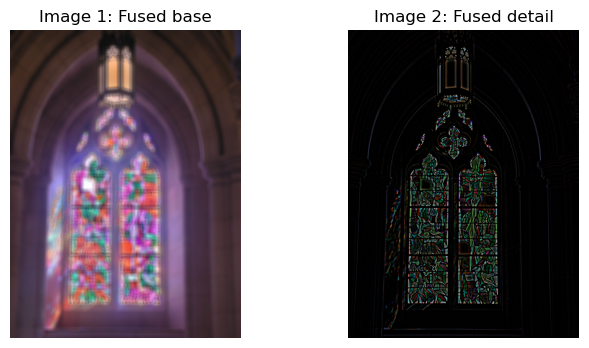

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fused image:


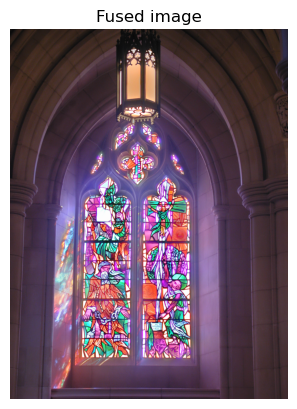

In [141]:
fused_image = fuse_images([im1, im2], verbose=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


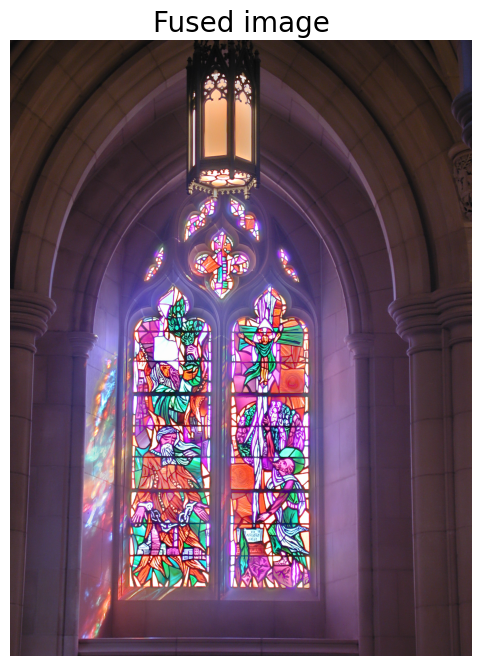

In [142]:
plt.figure(figsize=(8,8))
plt.imshow(fused_image)
plt.axis("off")
plt.title(f"Fused image", fontsize=20)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


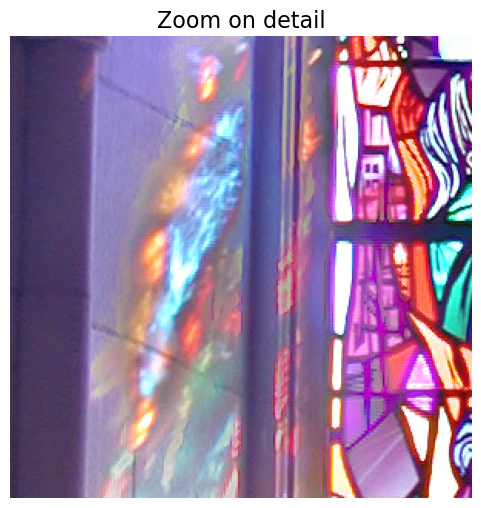

In [143]:
top_left = [1050,200]
zoom_on_detail(fused_image, top_left, 300, 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


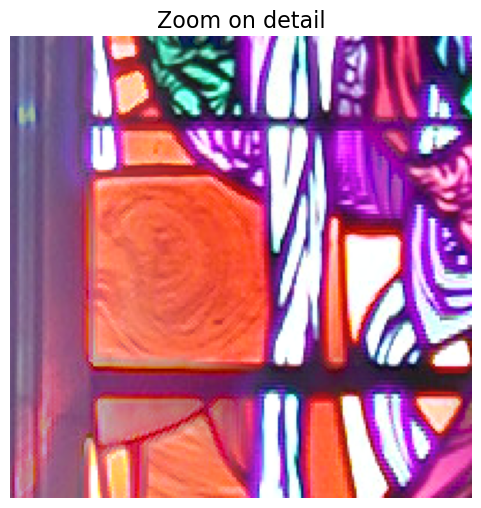

In [144]:
#Zooming on details
top_left = [1350,700]
zoom_on_detail(fused_image, top_left, 200, 200)

# Testing on multi-focus images

In [145]:
paper1 = plt.imread("dataset/multi-focus/grayscale/g_09_1.tif")
paper2 = plt.imread("dataset/multi-focus/grayscale/g_09_2.tif")
fused_paper = fuse_images([paper1, paper2])
print(fused_paper.shape)

(234, 322)


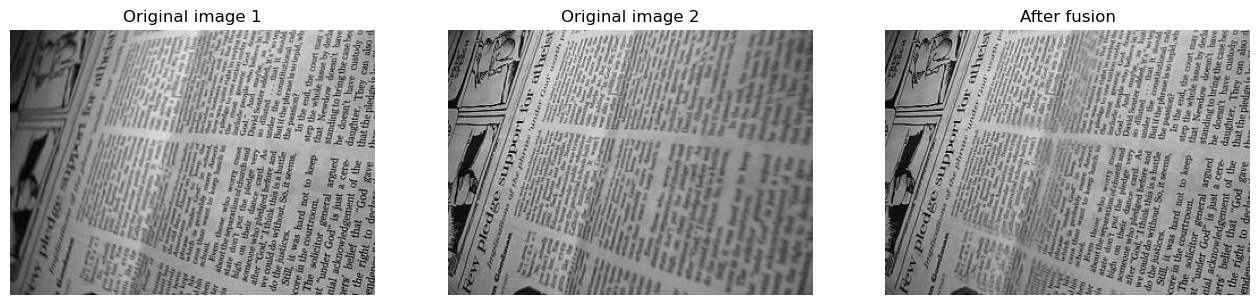

In [146]:
show_3_images(paper1, paper2, fused_paper, "Original image 1", "Original image 2", "After fusion", gray=True)

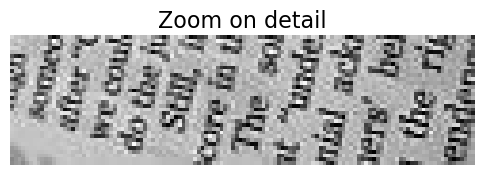

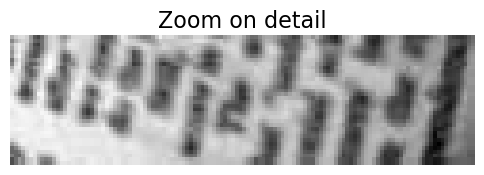

In [147]:
#Zooming on details
top_left = [200,200]
zoom_on_detail(fused_paper, top_left, 200, 200, grayscale=True)
zoom_on_detail(paper2, top_left, 200, 200, grayscale=True)

# Test on multi-source images

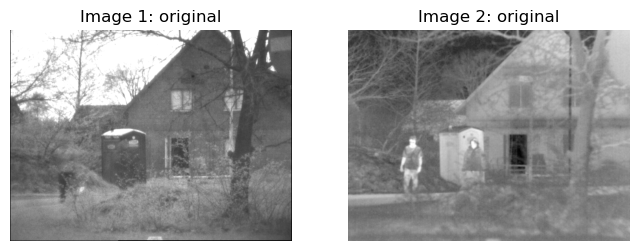

(576, 768)


In [148]:
meeting1 = plt.imread("dataset/multi-source/VIS_meting003_r.bmp")
meeting2 = plt.imread("dataset/multi-source/IR_meting003_g.bmp")
show_images(meeting1, meeting2, "original", "original", gray=True)
print(meeting1.shape)

In [149]:
fused_meeting = fuse_images([meeting1, meeting2])

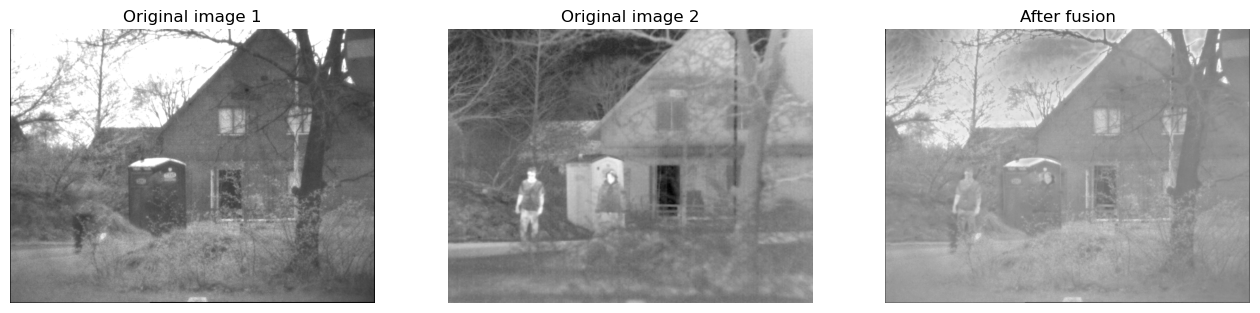

In [150]:
show_3_images(meeting1, meeting2, fused_meeting, "Original image 1", "Original image 2", "After fusion", gray=True)

# Qualitative study: impacts of hyperparameters

In [70]:
r1_standard=45
eps1_standard=0.3
r2_standard=7
eps2_standard=1e-6

test_img1 = plt.imread("dataset/multi-focus/color/c_03_1.tif")
test_img2 = plt.imread("dataset/multi-focus/color/c_03_2.tif")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


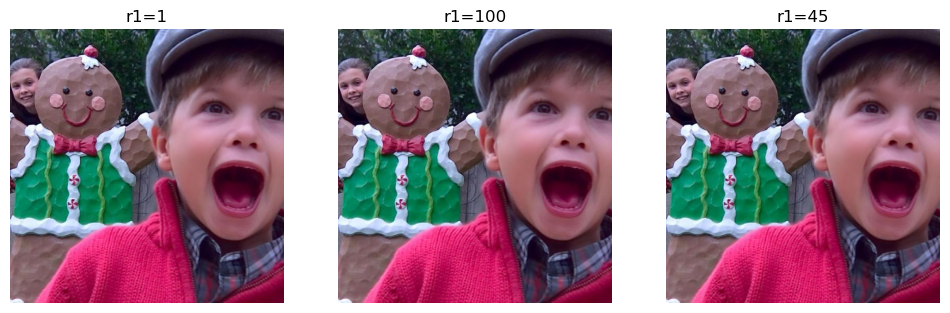

In [71]:
list_r1 = [1, 100 , r1_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, r1 in enumerate(list_r1):
    fused_test_img = fuse_images([test_img1, test_img2], r1=r1)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"r1={r1}")
plt.show()    

Computing base and detail layers...


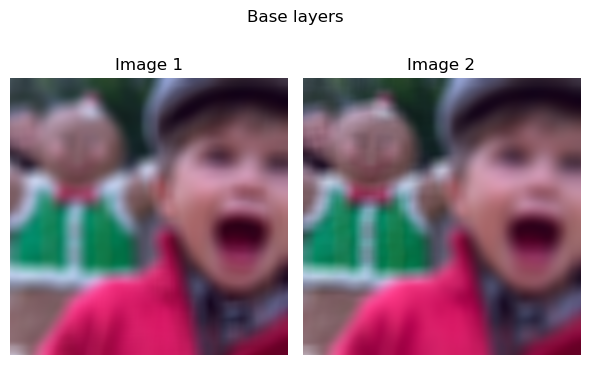

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


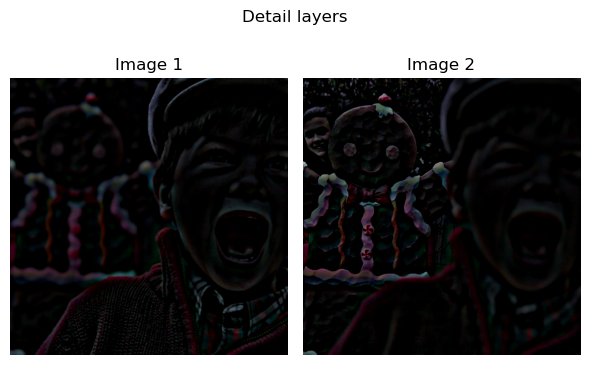


Computing saliency maps...


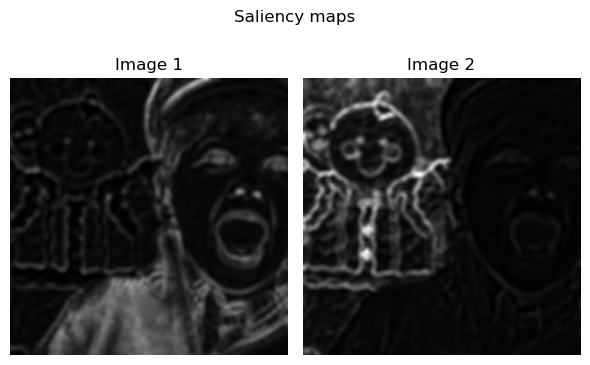


Computing weight maps...


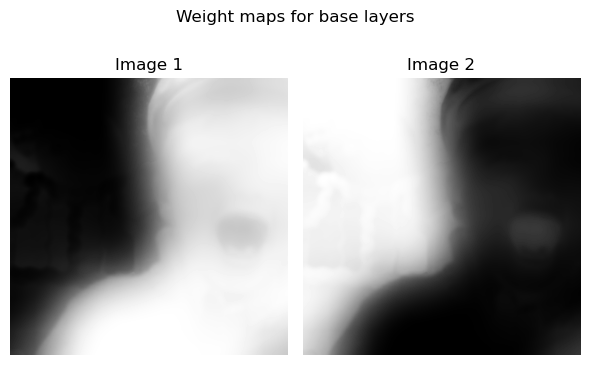

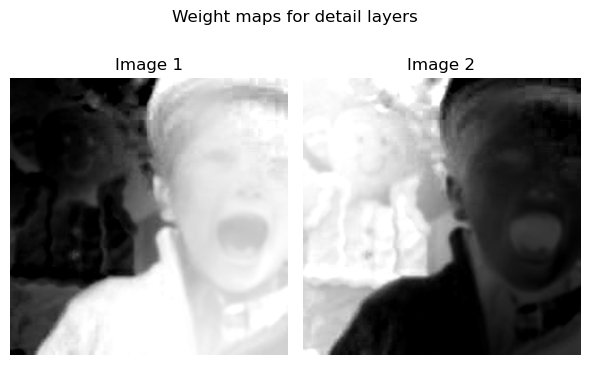

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fusing layers...


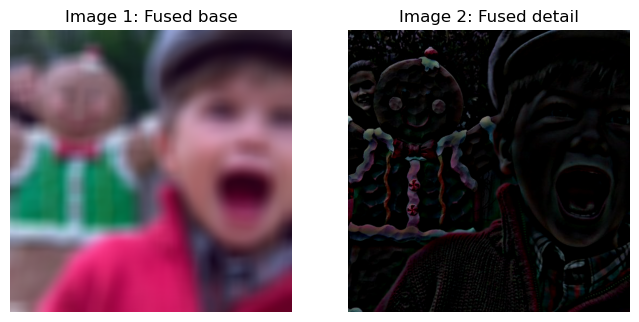

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fused image:


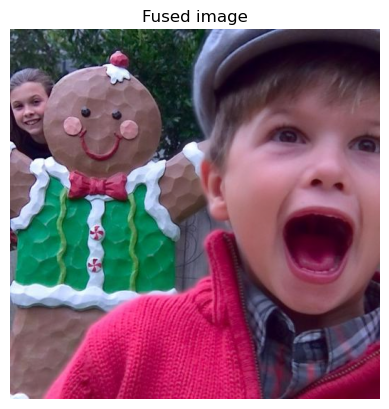

In [72]:
fused_test_img = fuse_images([test_img1, test_img2], r2=100, verbose=True)


Computing base and detail layers...


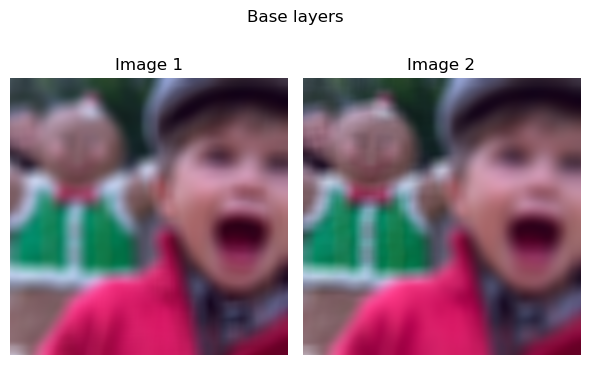

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


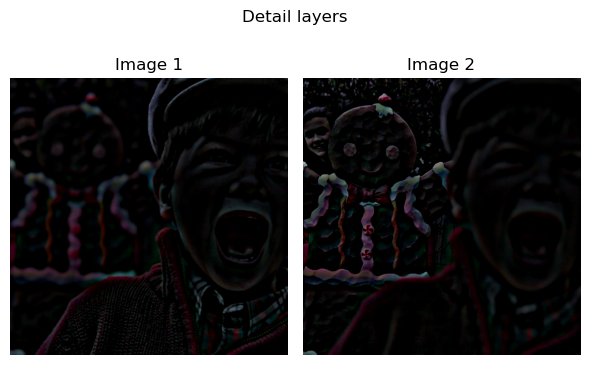


Computing saliency maps...


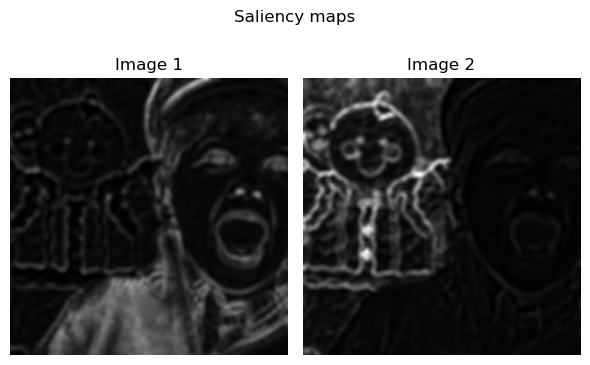


Computing weight maps...


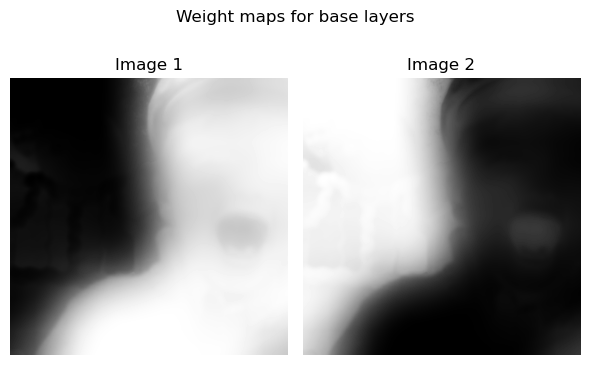

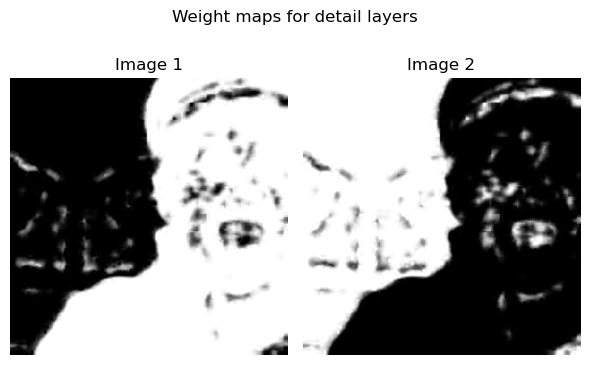

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fusing layers...


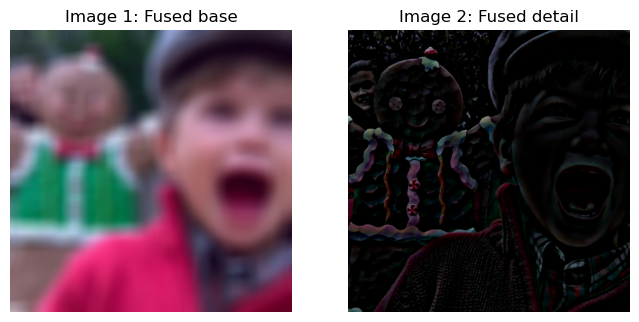

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Fused image:


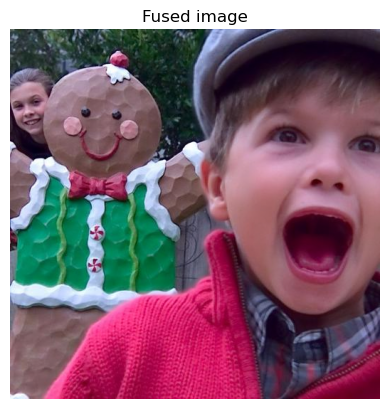

In [73]:
fused_test_img = fuse_images([test_img1, test_img2], r2=r2_standard, verbose=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


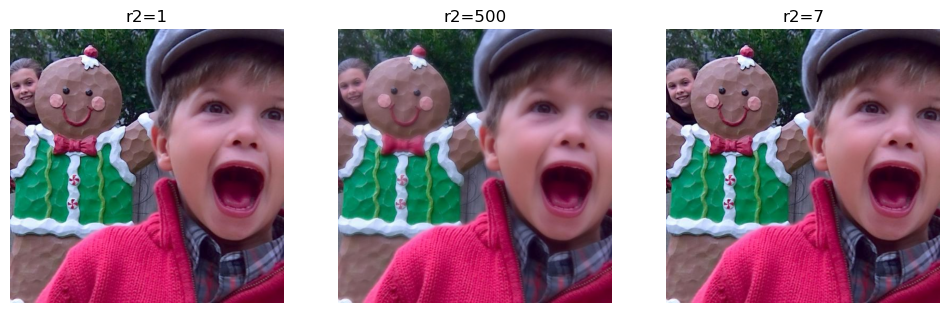

In [74]:
list_r2 = [1, 500, r2_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, r2 in enumerate(list_r2):
    fused_test_img = fuse_images([test_img1, test_img2], r2=r2)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"r2={r2}")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


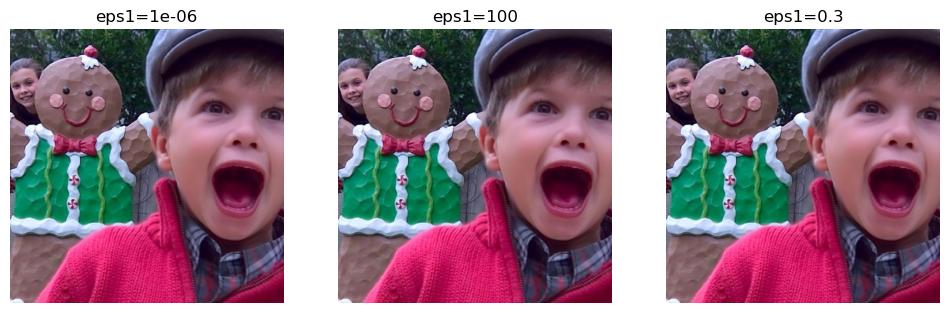

In [75]:
list_eps1 = [1e-6, 100, eps1_standard]
_, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, eps1 in enumerate(list_eps1):
    fused_test_img = fuse_images([test_img1, test_img2], eps1=eps1)
    axes[i].imshow(fused_test_img)
    axes[i].axis("off")
    axes[i].set_title(f"eps1={eps1}")
plt.show()